## Importação das bibliotecas utilizadas

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

##Leitura dos dados

In [30]:
df = pd.read_csv("/content/Image_3x3_8.csv")

## Análise de dados

**Dicionário das variáveis:**

* Última coluna: Representa o tipo do tumor em duas classes(ou "epithelium", ou "stroma")
* As Colunas restantes representam o sequenciamento da matriz SCM.
Ex: Quando a quantização for 8, serão 8x8 = 64 colunas + 1(Última coluna)

In [32]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,171,0,0,0,0,0,0,0,0,118,...,0,0,0,0,0,0,0,0,152,epithelium
1,48,0,0,0,0,0,0,0,0,56,...,0,0,0,0,0,0,0,0,141,epithelium
2,176,0,0,0,0,0,0,0,0,69,...,0,0,0,0,0,0,0,0,105,epithelium
3,190,0,0,0,0,0,0,0,0,155,...,0,0,0,0,0,0,0,0,110,epithelium
4,12,0,0,0,0,0,0,0,0,76,...,0,0,0,0,0,0,0,0,107,epithelium


In [52]:
df.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
60     int64
61     int64
62     int64
63     int64
64    object
Length: 65, dtype: object

In [36]:
# Função para ler uma linha do CSV e convertê-la em uma matriz 2D
def linha_para_matriz(caminho_arquivo, numero_linha):
    matriz_2d = []
    for i in range(len(caminho_arquivo)):
      with open(caminho_arquivo[i], 'r') as arquivo_csv:
          leitor_csv = csv.reader(arquivo_csv)

          for _ in range(numero_linha - 1):
              next(leitor_csv)

          linha = next(leitor_csv)
          matriz_2d.extend([linha])

    return matriz_2d

def imprimir_matriz(matriz_resultante, quantizacao):
  for j in range(len(matriz_resultante)):
    for i in range(len(matriz_resultante[0])):
      if(i%quantizacao==(quantizacao-1)):
        print(f"{matriz_resultante[j][i]}\n")
      else:
        print(matriz_resultante[j][i], end="  ")
    print("\n")


In [37]:
caminho_arquivo_csv_N16 = ["/content/Image_3x3_16.csv", "/content/Image_5x5_16.csv", "/content/Image_7x7_16.csv"]
caminho_arquivo_csv_N8 = ["/content/Image_3x3_8.csv", "/content/Image_5x5_8.csv", "/content/Image_7x7_8.csv"]
numero_linha_desejada = 2
matrizes_resultante_N16 = linha_para_matriz(caminho_arquivo_csv_N16, numero_linha_desejada)
matrizes_resultante_N8 = linha_para_matriz(caminho_arquivo_csv_N8, numero_linha_desejada)

imprimir_matriz(matrizes_resultante_N16, 16)
imprimir_matriz(matrizes_resultante_N8, 8)

106  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

0  26  0  0  0  0  0  0  0  0  0  0  0  0  0  0

0  0  192  0  0  0  0  0  0  0  0  0  0  0  0  0

0  0  0  56  0  0  0  0  0  0  0  0  0  0  0  0

0  0  0  0  247  0  0  0  0  0  0  0  0  0  0  0

0  0  0  0  0  114  0  0  0  0  0  0  0  0  0  0

0  0  0  0  0  0  254  0  0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  108  0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0  65  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0  0  92  0  0  0  0  0  0

0  0  0  0  0  0  0  0  0  0  100  0  0  0  0  0

0  0  0  0  0  0  0  0  0  0  0  19  0  0  0  0

0  0  0  0  0  0  0  0  0  0  0  0  117  0  0  0

0  0  0  0  0  0  0  0  0  0  0  0  0  201  0  0

0  0  0  0  0  0  0  0  0  0  0  0  0  0  51  0

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  44

epithelium  

46  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

0  105  0  0  0  0  0  0  0  0  0  0  0  0  0  0

0  0  129  0  0  0  0  0  0  0  0  0  0  0  0  0

0  0  0  233  0  0  0  0  0  0  0  0  0  0  

## **Análise de testes feitos:**

Dados obtidos: 400 - epithelium // 256 - stroma

Cross Validation, 10 folds, 3x3_8N.csv

* precisão total: 56%	Epithelium_precisão:62%		stroma_precisão:47%
* Recall total: 60%	Epithelium_recall:86%		stroma_recall:19%

Cross Validation, 10 folds, 3x3_16N.csv

* precisão total: 51%	Epithelium_precisão:60%		stroma_precisão:36%
* Recall total: 57%	Epithelium_recall:88%		stroma_recall:10%

Cross Validation, 10 folds, 5x5_8N.csv

* precisão total: 49%	Epithelium_precisão:59%		stroma_precisão:32%
* Recall total: 56%	Epithelium_recall:85%		stroma_recall:10%

Cross Validation, 10 folds, 5x5_16N.csv

* precisão total: 52%	Epithelium_precisão:61%		stroma_precisão:39%
* Recall total: 59%	Epithelium_recall:90%		stroma_recall:10%

Cross Validation, 10 folds, 7x7_8N.csv

* precisão total: 50%	Epithelium_precisão:60%		stroma_precisão:35%
* Recall total: 56%	Epithelium_recall:85%		stroma_recall:12%

Cross Validation, 10 folds, 7x7_16N.csv

* precisão total: 55%	Epithelium_precisão:61%		stroma_precisão:46%
* Recall total: 60%	Epithelium_recall:92%		stroma_recall:11%

##Testes de filtro:

Cross Validation, 5 folds, 3x3_8N.csv

* precisão total: 57%	Epithelium_precisão:62%		stroma_precisão:48%
* Recall total: 60%	Epithelium_recall:88%		stroma_recall:17%

Após ClassBalancer:
Cross Validation, 10 folds, 3x3_8N.csv

* precisão total: 51%	Epithelium_precisão:51%		stroma_precisão:52%
* Recall total: 51%	Epithelium_recall:70%		stroma_recall:33%

Resample:
Cross Validation, 10 folds, 3x3_8N.csv

* precisão total: 91%	Epithelium_precisão:90%		stroma_precisão:94%
* Recall total: 91%	Epithelium_recall:96%		stroma_recall:84%

### **Q1. dado a base de imagens utilizada neste trabalho, com quantos níveis de quantização N(8 ou 16) a SCM apresenta os melhores resultados?**

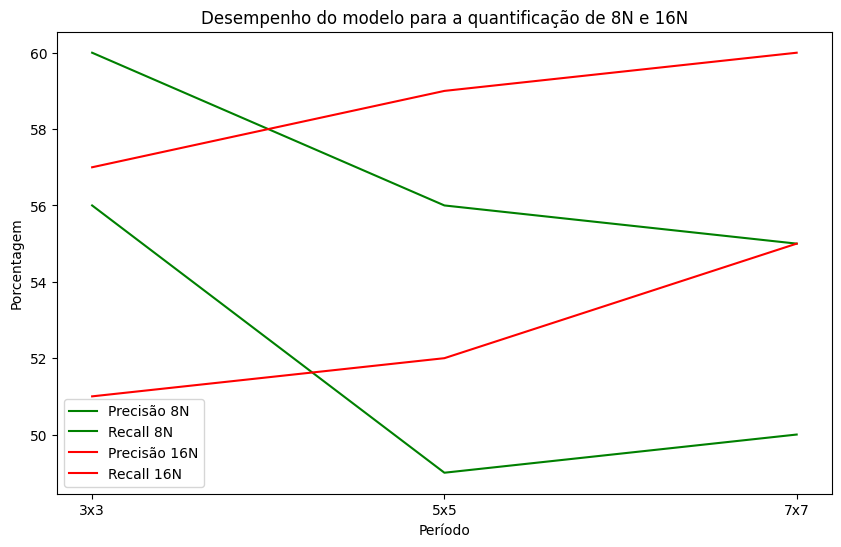

In [48]:
periodo = ["3x3", "5x5", "7x7"]
precisao_8N = [56, 49, 50]
recall_8N = [60, 56, 55]
precisao_16N = [51, 52, 55]
recall_16N = [57, 59, 60]

plt.figure(figsize=(10, 6))

plt.plot(periodo, precisao_8N, label='Precisão 8N', color="green")
plt.plot(periodo, recall_8N, label='Recall 8N', color="green")

plt.plot(periodo, precisao_16N, label='Precisão 16N', color="red")
plt.plot(periodo, recall_16N, label='Recall 16N', color ="red")


plt.title('Desempenho do modelo para a quantificação de 8N e 16N')
plt.xlabel('Período')
plt.ylabel('Porcentagem')
plt.legend()

plt.show()


- É possível perceber que para a quantização no valor de 8, á medida que aumentamos o tamanho do filtro aplicado na imagem para suavização, as métricas se tornam piores
- Já para o valor de quantização igual a 16, as métricas melhoram á medida que aumentamos o tamanho do filtro

### **Q2. Qual o impacto de se utilizar o filtro da média com janela 3x3, 5x5 e 7x7?**

Os filtros são comumente usados para reduzir o ruído e as variações de intensidade na imagem, tornando-a mais suave, alguns pontos agregados a isso são importantes de ressaltar:
- **Tamanho da Janela:** Quanto maior mais suave a imagem se torna, mas pode haver perca de detalhes na imagem
- **Suavização:** Pixels com valores extremos são atenuados, resultando em uma imagem com menos variações bruscas de intensidade.
- **Redução de Ruído:** Os filtros de média são eficazes na redução de ruídos de alta frequência na imagem. O ruído aleatório, é atenuado, o que melhora a qualidade visual da imagem.
- **Impacto na Matriz SCM (Matriz de Coocorrência de Textura):** A suavização pode resultar em uma matriz SCM com valores mais homogêneos, indicando menos variação de textura
- **Trade-off entre Suavização e Detalhes:**

# Conclusões

####Visto os resultados obtidos através dos testes com diferentes níveis de Quantização e diferentes tamanhos de filtros, as seguintes conclusões são pertinentes:
- Quanto maior o valor de quantização, é preferível que haja um tamanho maior de filtro que seja aplicado na imagem. Houve uam **aumento de 4% na precisão** e **aumento de 3% no recall**(comparação do filtro de 3x3 e 7x7, na quantização de 16 níveis)
- O contrário é valido também, para menores níveis de quantização, é sugerido que haja uma diminuição do filtro. Houve uma **diminuição de 6% na precisão** e **diminuição de 5% no recall**(comparação do filtro de 3x3 e 7x7, na quantização de 8 níveis)
- Utilizando diferentes filtros(NoFilter, ClassBalancer, Resample), percebemos que o que produz a melhor métrica quando é feito o treinamento é o **Resample**, havendo um **aumento significativo da precisão(91%) e Recall(91%)**
- Comparando as métricas em um conjunto de dados sem aplicação de filtro e outro com a aplicação do filtro ClassBalancer, é possível concluir que **não é um bom "trade-off"** visto que **há diminuição do valor de Precisão total e Recall total**